In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import time
from imblearn.over_sampling import SMOTE
import warnings

from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,StratifiedKFold,cross_val_score,RandomizedSearchCV

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,plot_confusion_matrix,classification_report
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [2]:
df_train=pd.read_csv('train_2v.csv')
df_test=pd.read_csv('test_2v.csv')

In [3]:
df_train.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


## Hypothesis

In [5]:
1. 

1.0

In [6]:
df_train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

## Data Preprocessing

In [7]:
for fea in df_train.drop('stroke',axis=1).columns:
    print('percentage missing values in ',fea,':',np.round(df_train[fea].isnull().sum()/len(df_train),2)*100,'%')


percentage missing values in  id : 0.0 %
percentage missing values in  gender : 0.0 %
percentage missing values in  age : 0.0 %
percentage missing values in  hypertension : 0.0 %
percentage missing values in  heart_disease : 0.0 %
percentage missing values in  ever_married : 0.0 %
percentage missing values in  work_type : 0.0 %
percentage missing values in  Residence_type : 0.0 %
percentage missing values in  avg_glucose_level : 0.0 %
percentage missing values in  bmi : 3.0 %
percentage missing values in  smoking_status : 31.0 %


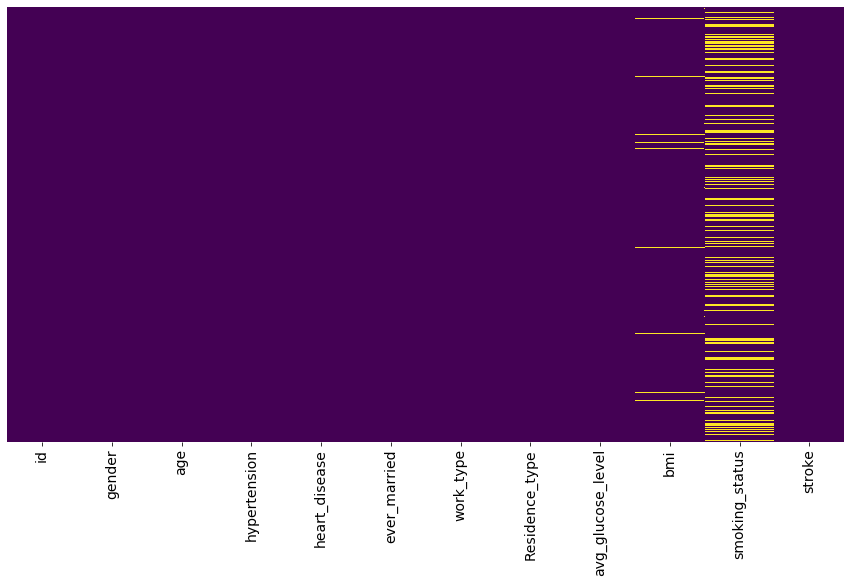

In [8]:
plt.figure(figsize=(15,8))
sb.heatmap(df_train.isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.xticks(fontsize=14)
plt.show()

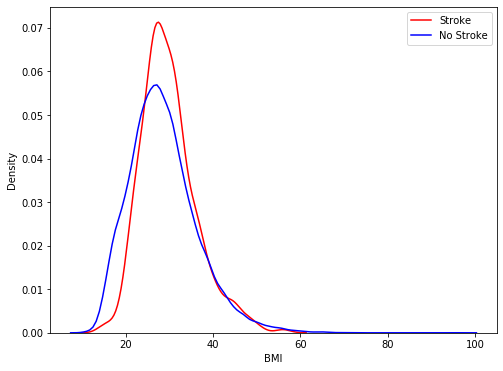

In [9]:
plt.figure(figsize=(8,6))
sb.kdeplot(df_train.loc[df_train['stroke']==1].bmi,label='Stroke',color='r')
sb.kdeplot(df_train.loc[df_train['stroke']==0].bmi,label='No Stroke',color='b')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

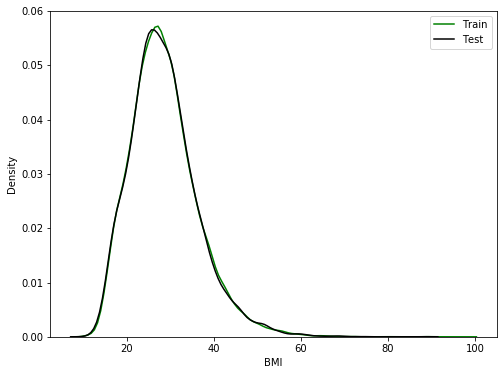

In [10]:
plt.figure(figsize=(8,6))
sb.kdeplot(df_train.bmi,label='Train',color='g')
sb.kdeplot(df_test.bmi,label='Test',color='k')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

### There is not much of a differnce between the peaks or for that matter distribution of BMI grouped by Stroke. I will be replacing the missing values in BMI by its median. This applies to both train and test data

In [11]:
df_train['bmi'].fillna(value=np.median(df_train['bmi'].dropna()),inplace=True)

#using the same strategy to fill the missing values in test data                       
df_test['bmi'].fillna(value=np.median(df_test['bmi'].dropna()),inplace=True)

In [12]:
df_test.isnull().sum()/len(df_test)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   0.000000
smoking_status       30.917693
dtype: float64

In [13]:
#lets fill the missing values in smoking status

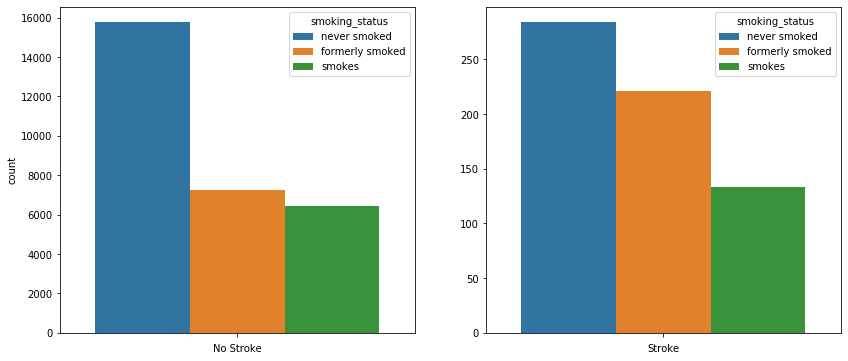

In [14]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sb.countplot(df_train.stroke[df_train.stroke==0],hue=df_train.smoking_status,ax=ax[0])
sb.countplot(df_train.stroke[df_train.stroke==1],hue=df_train.smoking_status,ax=ax[1])
ax[0].set_xticklabels('')
ax[0].set_xlabel('No Stroke')
ax[1].set_ylabel('Count')

ax[1].set_xticklabels('')
ax[1].set_xlabel('Stroke')
ax[1].set_ylabel('')


plt.show()

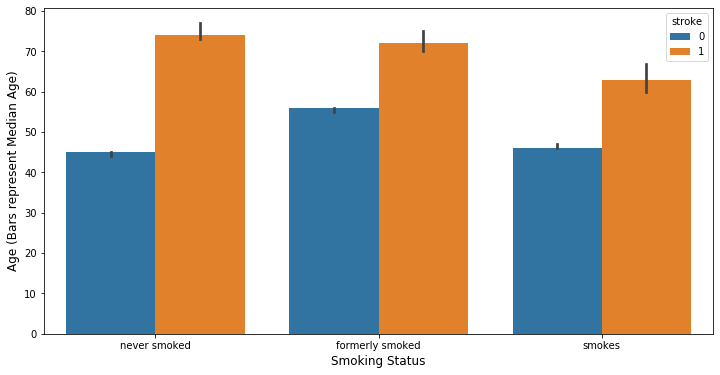

In [15]:
plt.figure(figsize=(12,6))
sb.barplot(y=df_train.age,x=df_train.smoking_status,hue=df_train.stroke,estimator=np.median)
plt.xlabel('Smoking Status',fontsize=12)
plt.ylabel('Age (Bars represent Median Age)',fontsize=12)
plt.show()

In [16]:
# df_train[(df_train.age<18) & (df_train.smoking_status.isnull())].fillna(value='never smoked',inplace=True,axis=0)

In [17]:
def under18(cols):
    c1=cols[0]
    c2=cols[1]
    if c1<18 and c2:
        return 'never smoked'
    else:
        return cols[1]

In [20]:
df_train['smoking_status']=df_train[['age','smoking_status']].apply(under18,axis=1)
df_test['smoking_status']=df_test[['age','smoking_status']].apply(under18,axis=1)

In [73]:
df_test.smoking_status.isnull().sum()/len(df_test)

0.16638890382237514

### After imputing nearly half the missing values with 'never smoked' for age<18, I am still left with ~7000 observastions which is neary 17% observastions. I tried few combinations to fill in these 17% values, however, taking time into consideration, imputing the missing values by a combination might introduce lot of error into the feature. For this reason, I am replacing the 17% of values with "unknown"

In [74]:
#replacing missing values with "unknown"
df_train.smoking_status.fillna("unknown",inplace=True)
df_test.smoking_status.fillna("unknown",inplace=True)


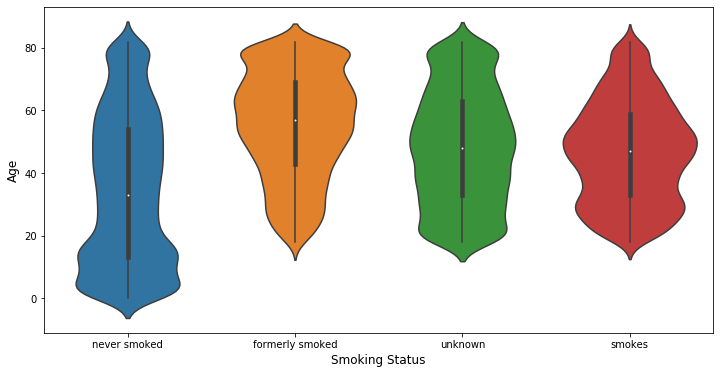

In [75]:
plt.figure(figsize=(12,6))
sb.violinplot(y=df_train.age,x=df_train.smoking_status)
plt.xlabel('Smoking Status',fontsize=12)
plt.ylabel('Age',fontsize=12)
plt.show()

In [81]:
print('Number of missing values if train dataset')
print(df_train.isnull().sum())

print('-'*50,'\n','Number of missing values if test dataset')
print(df_test.isnull().sum())

Number of missing values if train dataset
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
-------------------------------------------------- 
 Number of missing values if test dataset
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


In [123]:
def cohen_d(feature,class_varb):
    
    feature=feature.values
    x=feature[class_varb==class_varb.unique()[0]]
    y=feature[class_varb==class_varb.unique()[1]]
#     print('Cohens d: {:.2f}'.format((np.mean(x) - np.mean(y)) / np.sqrt((np.std(x, ddof=1) ** 2 + np.std(y, ddof=1) ** 2) / 2.0)))
    
    return (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x, ddof=1) ** 2 + np.std(y, ddof=1) ** 2) / 2.0)



## Hypothesis and Exploratory Data Analysis

### The following hypothesis are made on features and these will be tested as the part of Exploratory data analysis

#### 1. 'avg_glucose_level' might be good indicator of heart stroke. Higher the value, higher the risk of heart stroke
#### 2. If 'hypertension' and 'heart_disease' are pre-existing conditions then chances of highing heart stroke are high
#### 3. Higher the age higher the chances of having stroke
#### 4. 'bmi' in a way indicates the weight of an indvidual, so high bmi's might associate to heart stroke

In [150]:
df_train.groupby(df_train['stroke']).median()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36356,43.0,0,0,91.47,27.7
1,36236,71.0,0,0,104.47,27.7


In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  43400 non-null float64
smoking_status       43400 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


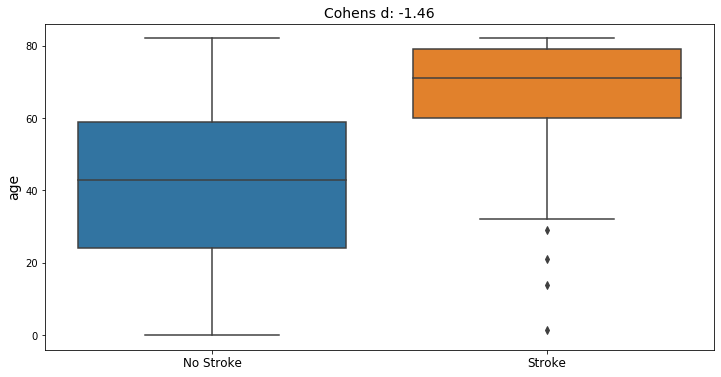

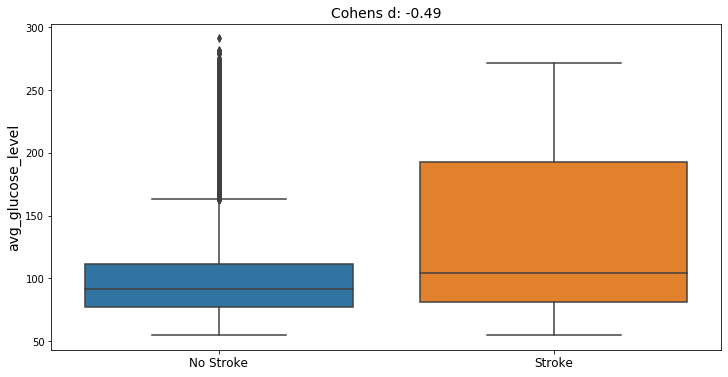

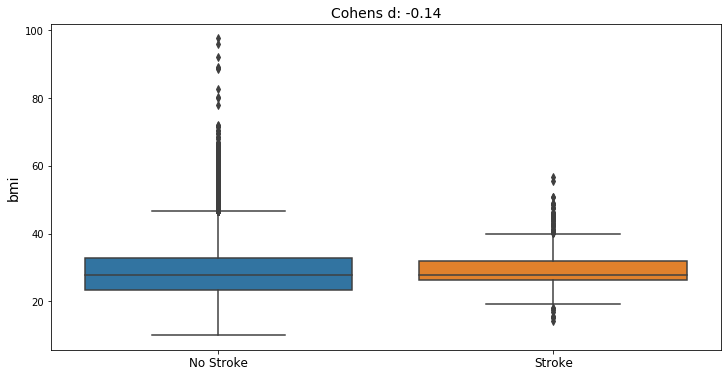

In [137]:
num_fea=['age','avg_glucose_level','bmi']

for fea in num_fea:
    
    plt.figure(figsize=(12,6))
    sb.boxplot(y=df_train[fea],x=df_train.stroke)
    plt.xticks([0,1],['No Stroke','Stroke'],fontsize=12)
    plt.xlabel('')
    plt.ylabel(fea,fontsize=14)
    plt.title('Cohens d: {:.2f}'.format(cohen_d(df_train[fea],df_train.stroke)),fontsize=14)
    plt.show()
    

### from the above box plots, 'age' and 'avg.glucose level' seems to be good indicators of heart stroke

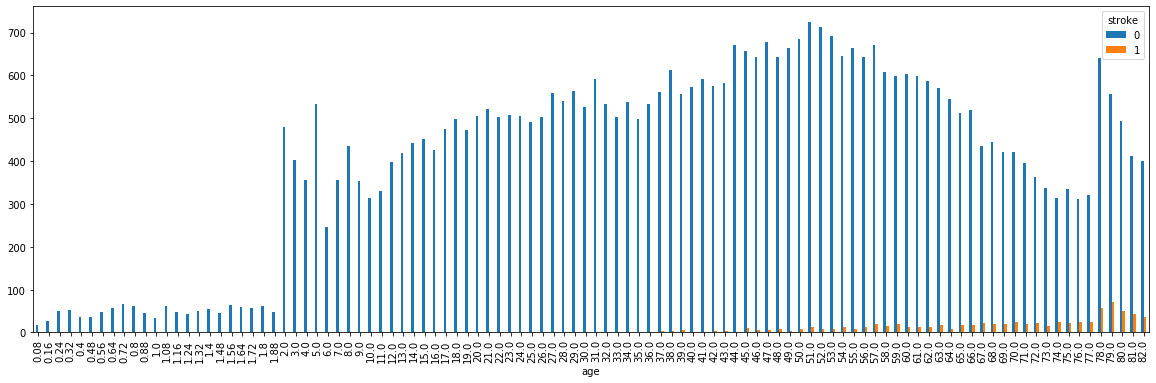

In [152]:
pd.crosstab(df_train.age,df_train.stroke).plot(kind='bar',figsize=(20,6))
plt.show()

### Although the above plot is difficult to read, if closely observed, there are no visible heartstrokes after the age of ~37yeras and it is more prominent ~57. This shows that 'age' binned into three categories (0-18,18-40, >40)

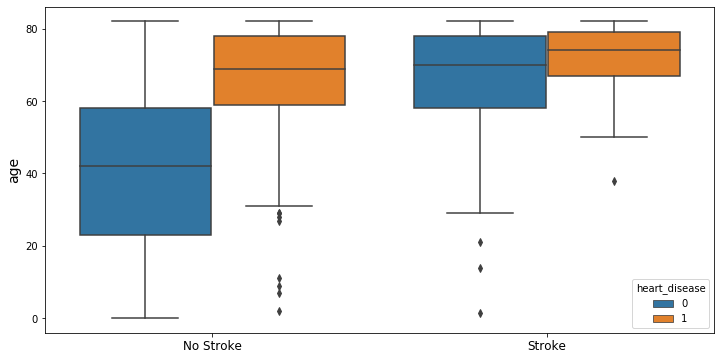

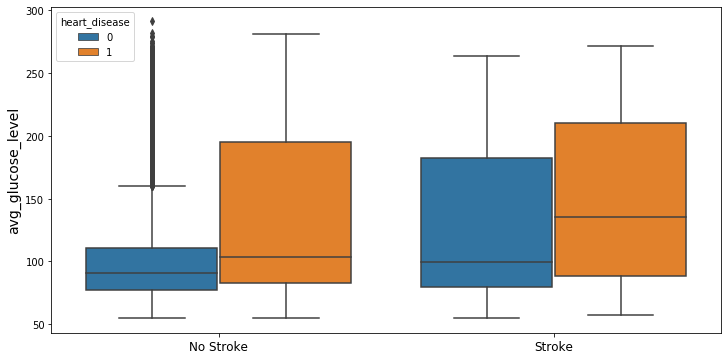

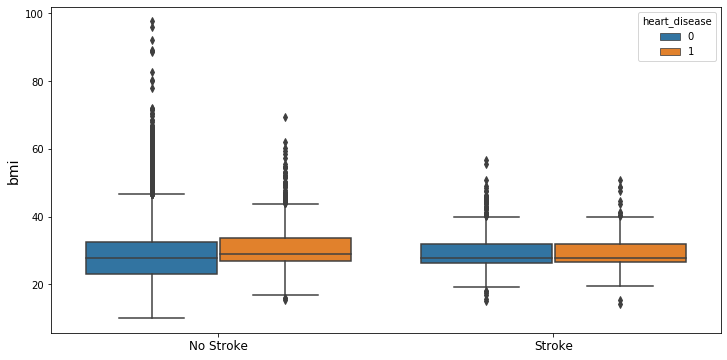

In [138]:
num_fea=['age','avg_glucose_level','bmi']

for fea in num_fea:
    
    plt.figure(figsize=(12,6))
    sb.boxplot(y=df_train[fea],x=df_train.stroke,hue=df_train.heart_disease)
    plt.xticks([0,1],['No Stroke','Stroke'],fontsize=12)
    plt.xlabel('')
    plt.ylabel(fea,fontsize=14)
#     plt.title('Cohens d: {:.2f}'.format(cohen_d(df_train[fea],df_train.stroke)),fontsize=14)
    plt.show()
    

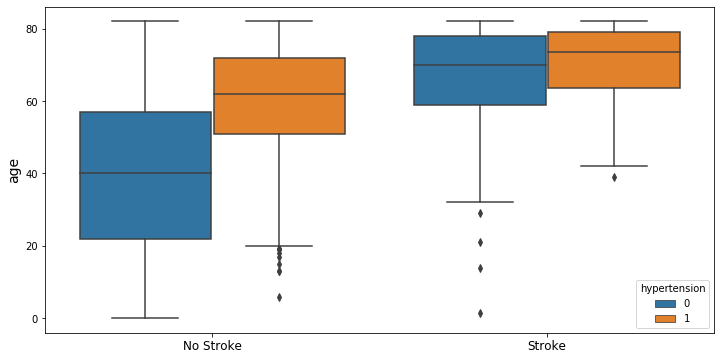

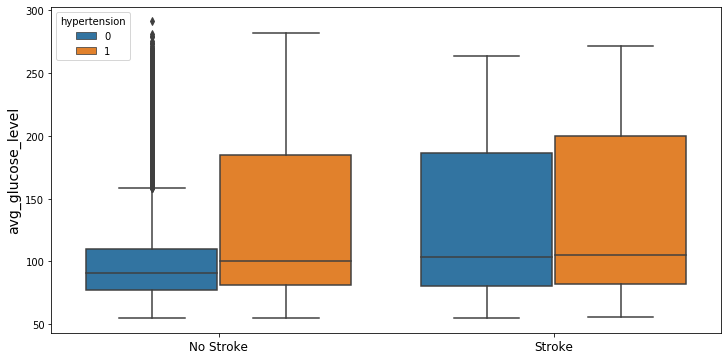

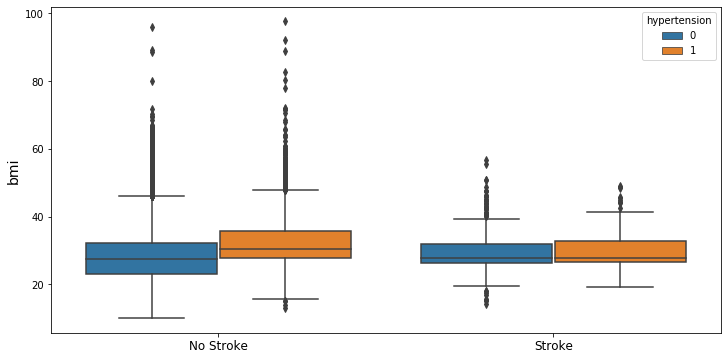

In [139]:
num_fea=['age','avg_glucose_level','bmi']

for fea in num_fea:
    
    plt.figure(figsize=(12,6))
    sb.boxplot(y=df_train[fea],x=df_train.stroke,hue=df_train.hypertension)
    plt.xticks([0,1],['No Stroke','Stroke'],fontsize=12)
    plt.xlabel('')
    plt.ylabel(fea,fontsize=14)
#     plt.title('Cohens d: {:.2f}'.format(cohen_d(df_train[fea],df_train.stroke)),fontsize=14)
    plt.show()
    

### from the above boxplots, people with higher age and higher avg.glucose who are have pre-existing conditions such as hypertension and heart_disease are more prone to heart stroke.

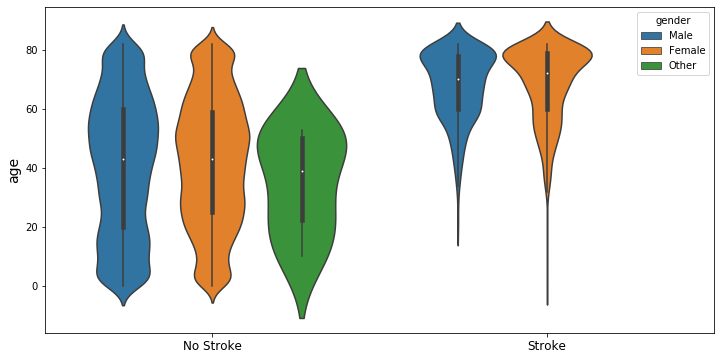

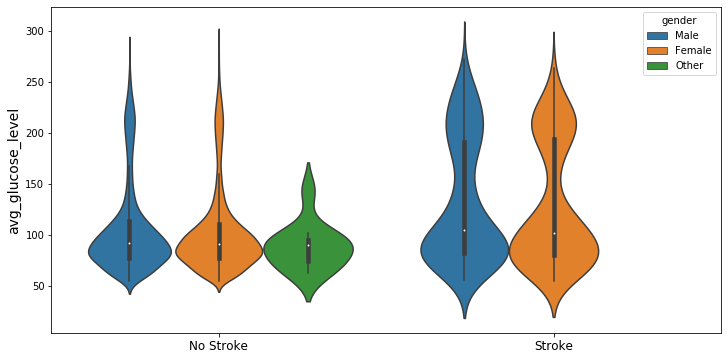

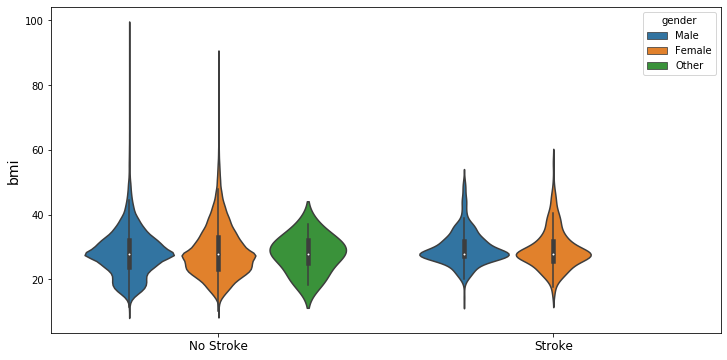

In [141]:
num_fea=['age','avg_glucose_level','bmi']

for fea in num_fea:
    
    plt.figure(figsize=(12,6))
    sb.violinplot(y=df_train[fea],x=df_train.stroke,hue=df_train.gender)
    plt.xticks([0,1],['No Stroke','Stroke'],fontsize=12)
    plt.xlabel('')
    plt.ylabel(fea,fontsize=14)
#     plt.title('Cohens d: {:.2f}'.format(cohen_d(df_train[fea],df_train.stroke)),fontsize=14)
    plt.show()
    

### from the above violin plots, age with gender is not revealing any information

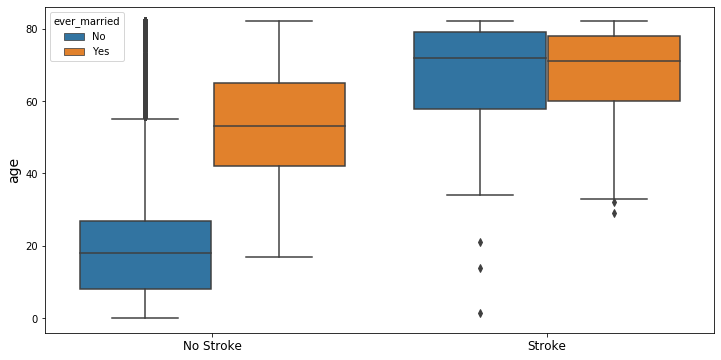

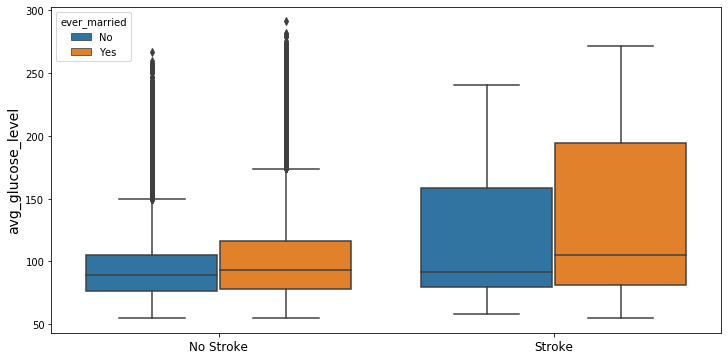

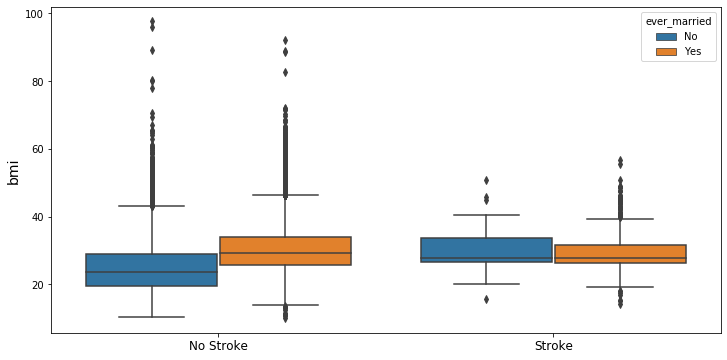

In [158]:
num_fea=['age','avg_glucose_level','bmi']

for fea in num_fea:
    
    plt.figure(figsize=(12,6))
    sb.boxplot(y=df_train[fea],x=df_train.stroke,hue=df_train.ever_married)
    plt.xticks([0,1],['No Stroke','Stroke'],fontsize=12)
    plt.xlabel('')
    plt.ylabel(fea,fontsize=14)
#     plt.title('Cohens d: {:.2f}'.format(cohen_d(df_train[fea],df_train.stroke)),fontsize=14)
    plt.show()
    

### 'ever married' might be an important feature, howeve, I feel that in conjugation with 'age' it might not explain something new, as probability of getting married is directly propotational to age 

### people who had 'stroke' and 'ever married' are having higher 'avg.glucose levels'. Interesting finding!!!!!

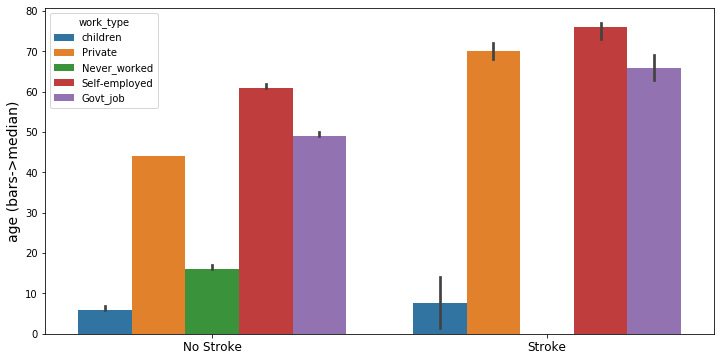

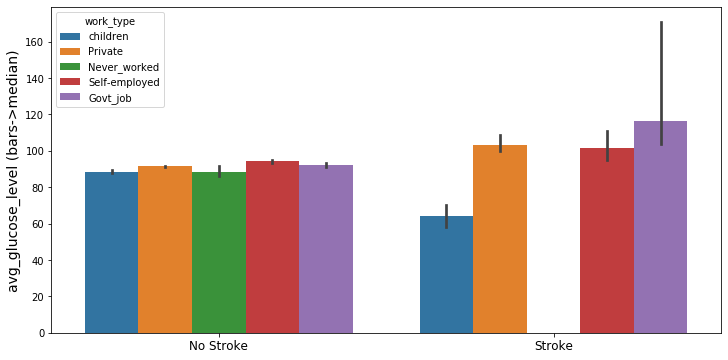

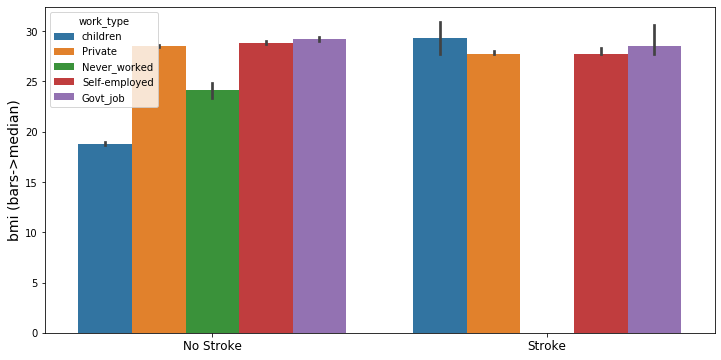

In [166]:
num_fea=['age','avg_glucose_level','bmi']

for fea in num_fea:
    
    plt.figure(figsize=(12,6))
    sb.barplot(y=df_train[fea],x=df_train.stroke,hue=df_train.work_type,estimator=np.median)
    plt.xticks([0,1],['No Stroke','Stroke'],fontsize=12)
    plt.xlabel('')
    plt.ylabel(fea+' (bars->median)',fontsize=14)
#     plt.title('Cohens d: {:.2f}'.format(cohen_d(df_train[fea],df_train.stroke)),fontsize=14)
    plt.show()
    

### There is no much of information availble from these plots, except for 'age' faceted on 'work_type', which shows old aged (median age ~70) 'private' and 'self employed' are prone to stroke

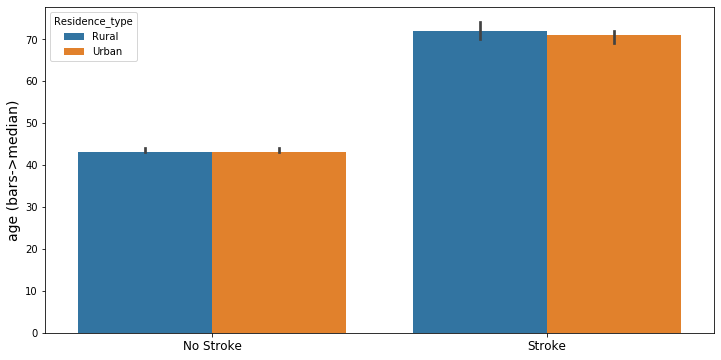

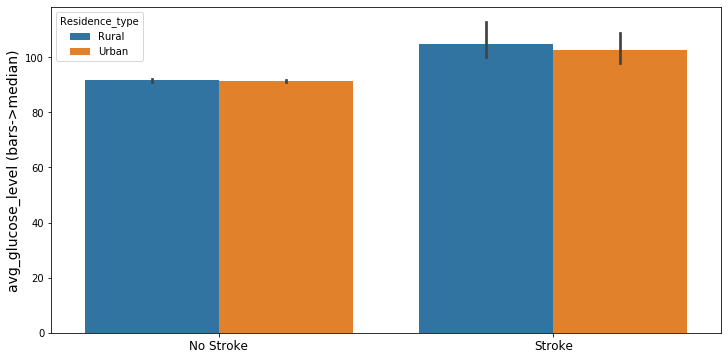

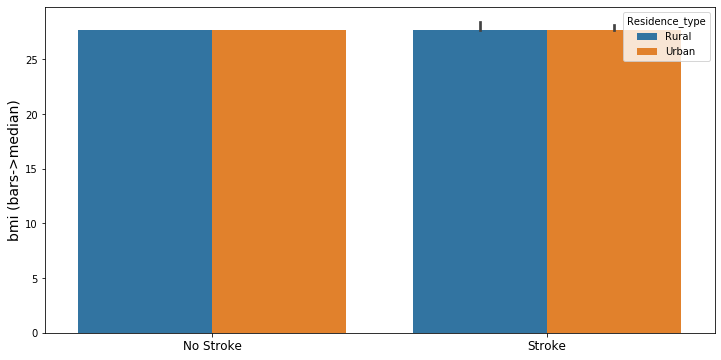

In [167]:
num_fea=['age','avg_glucose_level','bmi']

for fea in num_fea:
    
    plt.figure(figsize=(12,6))
    sb.barplot(y=df_train[fea],x=df_train.stroke,hue=df_train.Residence_type,estimator=np.median)
    plt.xticks([0,1],['No Stroke','Stroke'],fontsize=12)
    plt.xlabel('')
    plt.ylabel(fea+' (bars->median)',fontsize=14)
#     plt.title('Cohens d: {:.2f}'.format(cohen_d(df_train[fea],df_train.stroke)),fontsize=14)
    plt.show()
    

### categorival vs dependent variable

In [169]:
married=pd.crosstab(df_train.ever_married,df_train.stroke)
smoke=pd.crosstab(df_train.smoking_status,df_train.stroke)
work=pd.crosstab(df_train.work_type,df_train.stroke)
resid=pd.crosstab(df_train.Residence_type,df_train.stroke)
bp=pd.crosstab(df_train.hypertension,df_train.stroke)
hrtdis=pd.crosstab(df_train.heart_disease,df_train.stroke)

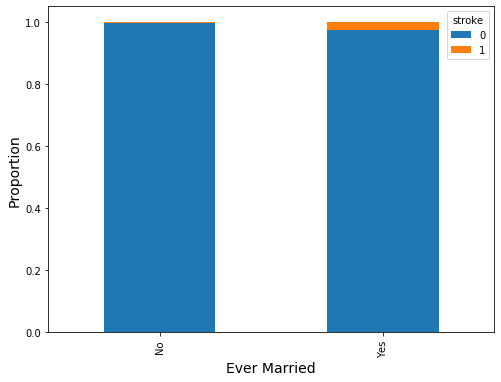

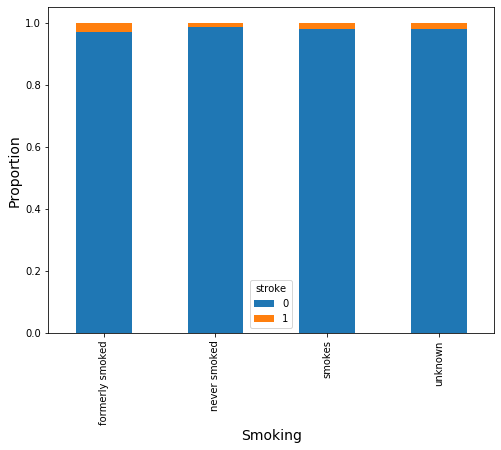

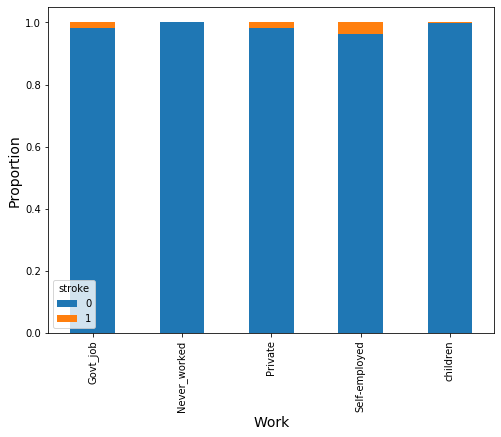

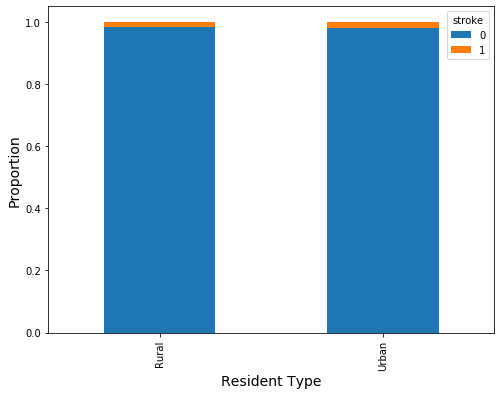

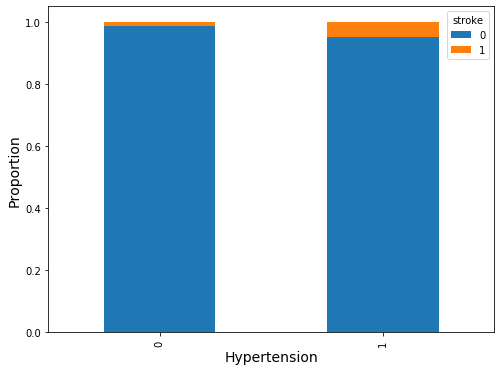

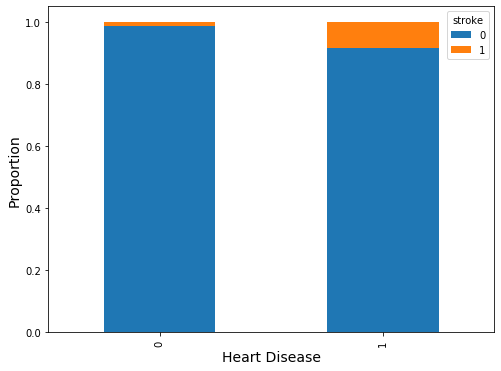

In [186]:
married.div(married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,6))
plt.ylabel('Proportion',fontsize=14)
plt.xlabel('Ever Married',fontsize=14)
plt.show()

smoke.div(smoke.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,6))
plt.ylabel('Proportion',fontsize=14)
plt.xlabel('Smoking',fontsize=14)
plt.show()

work.div(work.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,6))
plt.ylabel('Proportion',fontsize=14)
plt.xlabel('Work',fontsize=14)
plt.show()

resid.div(resid.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,6))
plt.ylabel('Proportion',fontsize=14)
plt.xlabel('Resident Type',fontsize=14)
plt.show()

bp.div(bp.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,6))
plt.ylabel('Proportion',fontsize=14)
plt.xlabel('Hypertension',fontsize=14)
plt.show()

hrtdis.div(hrtdis.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,6))
plt.ylabel('Proportion',fontsize=14)
plt.xlabel('Heart Disease',fontsize=14)
plt.show()





### People who pre-existing 'hypoertension' and 'heart_disease' are prone to heart stroke when compared to the other the other group. It seems all the categorical features are very import. 

## Feature Engineering

### 1. binning the age into 4 groups
### 2. encoding categorical features

In [370]:
df_tr=df_train.copy()
df_te=df_test.copy()

df_tr.drop('id',axis=1,inplace=True)
df_te.drop('id',axis=1,inplace=True)


bins=[0,18,40,60,99]
# labels=['age_18','age_18_40','age_40_60','age_60_99']
labels=['children','young_adult','adult','elderly']

df_tr['age']=pd.cut(df_train.age,bins=bins,labels=labels)
df_te['age']=pd.cut(df_test.age,bins=bins,labels=labels)

# df_tr.ever_married=df_tr.ever_married.map({'No':0,'Yes':1})
# df_te.ever_married=df_te.ever_married.map({'No':0,'Yes':1})

# df_tr.gender=df_tr.gender.map({'Male':1,'Female':2})
# df_te.gender=df_te.gender.map({'Male':1,'Female':2})

df_tr.age=df_tr.age.map({'children':1,'young_adult':2,'adult':3,'elderly':4})
df_te.age=df_te.age.map({'children':1,'young_adult':2,'adult':3,'elderly':4})

df_tr.work_type=df_tr.work_type.map({'children':1,'Private':2,'Never_worked':3,'Self-employed':4,'Govt_job':5})
df_te.work_type=df_te.work_type.map({'children':1,'Private':2,'Never_worked':3,'Self-employed':4,'Govt_job':5})
df_tr.work_type=df_tr.work_type.astype('category')
df_te.work_type=df_te.work_type.astype('category')

# df_tr.Residence_type=df_tr.Residence_type.map({'Rural':1,'Urban':2})
# df_te.Residence_type=df_te.Residence_type.map({'Rural':1,'Urban':2})

df_tr.smoking_status=df_tr.smoking_status.map({'never smoked':1,'formerly smoked':2,'unknown':3,'smokes':4})
df_te.smoking_status=df_te.smoking_status.map({'never smoked':1,'formerly smoked':2,'unknown':3,'smokes':4})
df_tr.smoking_status=df_tr.smoking_status.astype('category')
df_te.smoking_status=df_te.smoking_status.astype('category')

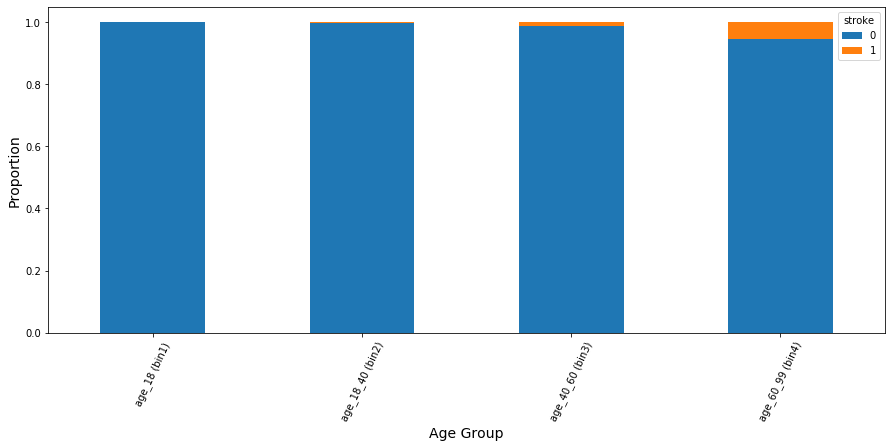

In [452]:
aged=pd.crosstab(df_tr['age'],df_tr['stroke'])
aged.div(aged.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(15,6))
plt.ylabel('Proportion',fontsize=14)
plt.xlabel('Age Group',fontsize=14)
plt.xticks(ticks=[0,1,2,3],labels=['age_18 (bin1)','age_18_40 (bin2)','age_40_60 (bin3)','age_60_99 (bin4)'],rotation=65)
plt.show()

In [453]:
df_train.groupby(df_train['ever_married'])['age'].median()

ever_married
No     18.0
Yes    54.0
Name: age, dtype: float64

In [262]:
df_tr.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1,0,0,No,1,Rural,95.12,18.0,1,0
1,Male,3,1,0,Yes,2,Urban,87.96,39.2,1,0
2,Female,1,0,0,No,2,Urban,110.89,17.6,1,0
3,Female,4,0,0,Yes,2,Rural,69.04,35.9,2,0
4,Male,1,0,0,No,3,Rural,161.28,19.1,1,0
5,Female,3,0,0,Yes,2,Urban,210.95,50.1,3,0
6,Female,3,0,0,Yes,2,Urban,77.59,17.7,2,0
7,Female,4,0,1,Yes,4,Rural,243.53,27.0,1,0
8,Female,2,0,0,Yes,2,Rural,77.67,32.3,4,0
9,Female,4,1,0,Yes,4,Urban,205.84,54.6,1,0


In [263]:
df_te.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,4,0,0,Yes,2,Urban,83.84,21.1,2
1,Female,4,0,1,Yes,4,Rural,179.50,26.0,2
2,Female,1,0,0,No,1,Rural,95.16,21.2,1
3,Male,2,0,0,No,2,Urban,94.76,23.4,3
4,Female,4,0,0,Yes,5,Rural,83.57,27.6,1
5,Female,4,1,0,Yes,2,Urban,219.98,32.2,1
6,Female,3,0,0,Yes,4,Rural,74.03,25.1,3
7,Male,3,0,0,Yes,5,Urban,120.80,32.5,1
8,Female,4,0,0,Yes,4,Rural,78.71,28.0,1
9,Male,4,0,0,Yes,4,Urban,77.20,25.7,4


### creating dummy variables

In [274]:
to_dummies=['gender','age','ever_married','work_type','Residence_type','smoking_status']
df_tr_dummies=pd.get_dummies(df_tr[to_dummies],drop_first=True)
df_te_dummies=pd.get_dummies(df_te[to_dummies],drop_first=True)

df_tr_final=pd.concat([df_tr.drop(to_dummies,axis=1),df_tr_dummies],axis=1)
df_te_final=pd.concat([df_te.drop(to_dummies,axis=1),df_te_dummies],axis=1)


In [275]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
gender               43400 non-null object
age                  43400 non-null category
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null category
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  43400 non-null float64
smoking_status       43400 non-null category
stroke               43400 non-null int64
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 2.8+ MB


In [276]:
df_tr_dummies.head(10)

,gender_Male,gender_Other,age_2,age_3,age_4,ever_married_Yes,work_type_2,work_type_3,work_type_4,work_type_5,Residence_type_Urban,smoking_status_2,smoking_status_3,smoking_status_4
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,1,1,1,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,1,1,0,0,0,1,0,1,0
6,0,0,0,1,0,1,1,0,0,0,1,1,0,0
7,0,0,0,0,1,1,0,0,1,0,0,0,0,0
8,0,0,1,0,0,1,1,0,0,0,0,0,0,1
9,0,0,0,0,1,1,0,0,1,0,1,0,0,0


In [277]:
df_tr_final.head(10)

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,age_2,age_3,age_4,ever_married_Yes,work_type_2,work_type_3,work_type_4,work_type_5,Residence_type_Urban,smoking_status_2,smoking_status_3,smoking_status_4
0,0,0,95.12,18.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,87.96,39.2,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0
2,0,0,110.89,17.6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,69.04,35.9,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0
4,0,0,161.28,19.1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,210.95,50.1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0
6,0,0,77.59,17.7,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0
7,0,1,243.53,27.0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
8,0,0,77.67,32.3,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1
9,1,0,205.84,54.6,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0


In [278]:
df_te_final.head(10)

,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,age_2,age_3,age_4,ever_married_Yes,work_type_2,work_type_3,work_type_4,work_type_5,Residence_type_Urban,smoking_status_2,smoking_status_3,smoking_status_4
0,0,0,83.84,21.1,1,0,0,0,1,1,1,0,0,0,1,1,0,0
1,0,1,179.50,26.0,0,0,0,0,1,1,0,0,1,0,0,1,0,0
2,0,0,95.16,21.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,94.76,23.4,1,0,1,0,0,0,1,0,0,0,1,0,1,0
4,0,0,83.57,27.6,0,0,0,0,1,1,0,0,0,1,0,0,0,0
5,1,0,219.98,32.2,0,0,0,0,1,1,1,0,0,0,1,0,0,0
6,0,0,74.03,25.1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
7,0,0,120.80,32.5,1,0,0,1,0,1,0,0,0,1,1,0,0,0
8,0,0,78.71,28.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
9,0,0,77.20,25.7,1,0,0,0,1,1,0,0,1,0,1,0,0,1


In [279]:
df_tr_final.shape,df_te_final.shape

((43400, 19), (18601, 18))

In [280]:
df_tr_final.shape,x_train.shape,x_test.shape

((43400, 19), (36890, 18), (6510, 18))

### standardizing the features

In [282]:
std_scaler=StandardScaler()

std_scaler.fit(df_tr_final.drop('stroke',axis=1))
train=std_scaler.transform(df_tr_final.drop('stroke',axis=1))
test=std_scaler.transform(df_te_final)

x_train=std_scaler.fit_transform(x_train)
x_test=std_scaler.fit_transform(x_test)

df_tr_final=pd.DataFrame(train,columns=df_tr_final.drop('stroke',axis=1).columns)
df_te_final=pd.DataFrame(test,columns=df_te_final.columns)

df_tr_final['stroke']=df_train.stroke

In [286]:
df_tr_final.head(10)

,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,age_2,age_3,age_4,ever_married_Yes,work_type_2,work_type_3,work_type_4,work_type_5,Residence_type_Urban,smoking_status_2,smoking_status_3,smoking_status_4,stroke
0,-0.321296,-0.223342,-0.217176,-1.384161,1.203602,-0.015922,-0.608164,-0.658679,-0.565323,-1.344203,-1.156549,-0.063993,-0.430773,-0.378561,-1.002584,-0.449795,-0.445011,-0.419287,0
1,3.112398,-0.223342,-0.383258,1.390824,1.203602,-0.015922,-0.608164,1.518191,-0.565323,0.743935,0.864641,-0.063993,-0.430773,-0.378561,0.997423,-0.449795,-0.445011,-0.419287,0
2,-0.321296,-0.223342,0.148621,-1.436520,-0.830840,-0.015922,-0.608164,-0.658679,-0.565323,-1.344203,0.864641,-0.063993,-0.430773,-0.378561,0.997423,-0.449795,-0.445011,-0.419287,0
3,-0.321296,-0.223342,-0.822123,0.958869,-0.830840,-0.015922,-0.608164,-0.658679,1.768900,0.743935,0.864641,-0.063993,-0.430773,-0.378561,-1.002584,2.223233,-0.445011,-0.419287,0
4,-0.321296,-0.223342,1.317458,-1.240176,1.203602,-0.015922,-0.608164,-0.658679,-0.565323,-1.344203,-1.156549,15.626828,-0.430773,-0.378561,-1.002584,-0.449795,-0.445011,-0.419287,0
5,-0.321296,-0.223342,2.469593,2.817585,-0.830840,-0.015922,-0.608164,1.518191,-0.565323,0.743935,0.864641,-0.063993,-0.430773,-0.378561,0.997423,-0.449795,2.247137,-0.419287,0
6,-0.321296,-0.223342,-0.623799,-1.423430,-0.830840,-0.015922,-0.608164,1.518191,-0.565323,0.743935,0.864641,-0.063993,-0.430773,-0.378561,0.997423,2.223233,-0.445011,-0.419287,0
7,-0.321296,4.477446,3.225312,-0.206102,-0.830840,-0.015922,-0.608164,-0.658679,1.768900,0.743935,-1.156549,-0.063993,2.321407,-0.378561,-1.002584,-0.449795,-0.445011,-0.419287,0
8,-0.321296,-0.223342,-0.621943,0.487645,-0.830840,-0.015922,1.644294,-0.658679,-0.565323,0.743935,0.864641,-0.063993,-0.430773,-0.378561,-1.002584,-0.449795,-0.445011,2.385003,0
9,3.112398,-0.223342,2.351062,3.406615,-0.830840,-0.015922,-0.608164,-0.658679,1.768900,0.743935,-1.156549,-0.063993,2.321407,-0.378561,0.997423,-0.449795,-0.445011,-0.419287,0


In [291]:
df_te_final.head(10)

,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,age_2,age_3,age_4,ever_married_Yes,work_type_2,work_type_3,work_type_4,work_type_5,Residence_type_Urban,smoking_status_2,smoking_status_3,smoking_status_4
0,-0.321296,-0.223342,-0.478825,-0.978385,1.203602,-0.015922,-0.608164,-0.658679,1.768900,0.743935,0.864641,-0.063993,-0.430773,-0.378561,0.997423,2.223233,-0.445011,-0.419287
1,-0.321296,4.477446,1.740085,-0.336997,-0.830840,-0.015922,-0.608164,-0.658679,1.768900,0.743935,-1.156549,-0.063993,2.321407,-0.378561,-1.002584,2.223233,-0.445011,-0.419287
2,-0.321296,-0.223342,-0.216249,-0.965296,-0.830840,-0.015922,-0.608164,-0.658679,-0.565323,-1.344203,-1.156549,-0.063993,-0.430773,-0.378561,-1.002584,-0.449795,-0.445011,-0.419287
3,-0.321296,-0.223342,-0.225527,-0.677326,1.203602,-0.015922,1.644294,-0.658679,-0.565323,-1.344203,0.864641,-0.063993,-0.430773,-0.378561,0.997423,-0.449795,2.247137,-0.419287
4,-0.321296,-0.223342,-0.485088,-0.127564,-0.830840,-0.015922,-0.608164,-0.658679,1.768900,0.743935,-1.156549,-0.063993,-0.430773,2.641579,-1.002584,-0.449795,-0.445011,-0.419287
5,3.112398,-0.223342,2.679051,0.474555,-0.830840,-0.015922,-0.608164,-0.658679,1.768900,0.743935,0.864641,-0.063993,-0.430773,-0.378561,0.997423,-0.449795,-0.445011,-0.419287
6,-0.321296,-0.223342,-0.706376,-0.454803,-0.830840,-0.015922,-0.608164,1.518191,-0.565323,0.743935,-1.156549,-0.063993,2.321407,-0.378561,-1.002584,-0.449795,2.247137,-0.419287
7,-0.321296,-0.223342,0.378492,0.513824,1.203602,-0.015922,-0.608164,1.518191,-0.565323,0.743935,-1.156549,-0.063993,-0.430773,2.641579,0.997423,-0.449795,-0.445011,-0.419287
8,-0.321296,-0.223342,-0.597820,-0.075206,-0.830840,-0.015922,-0.608164,-0.658679,1.768900,0.743935,-1.156549,-0.063993,2.321407,-0.378561,-1.002584,-0.449795,-0.445011,-0.419287
9,-0.321296,-0.223342,-0.632845,-0.376266,1.203602,-0.015922,-0.608164,-0.658679,1.768900,0.743935,-1.156549,-0.063993,2.321407,-0.378561,0.997423,-0.449795,-0.445011,2.385003


### splitting the training data into train and test datasets

In [287]:
x_train,x_test,y_train,y_test=train_test_split(df_tr_final.drop('stroke',axis=1),df_tr_final.stroke,
                                               test_size=0.15,stratify=df_tr_final.stroke,random_state=100)

In [288]:
x_train.shape,x_test.shape

((36890, 18), (6510, 18))

In [296]:
classifiers = {
    "LogisiticRegression": LogisticRegression(class_weight='balanced'),
#     "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(class_weight='balanced'),
    "DecisionTreeClassifier": DecisionTreeClassifier(class_weight='balanced')
    
}

In [459]:
for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_score = cross_val_score(classifier, x_train, y_train, cv=starcv,scoring='roc_auc')
    print("Classifiers: ", classifier.__class__.__name__, "has a training AUC cross validation score of", round(training_score.mean(), 2))

Classifiers:  LogisticRegression has a training AUC cross validation score of 0.83
Classifiers:  SVC has a training AUC cross validation score of 0.78
Classifiers:  DecisionTreeClassifier has a training AUC cross validation score of 0.52


In [301]:
model_log=LogisticRegression(class_weight='balanced').fit(x_train,y_train)
model_svm=SVC(class_weight='balanced').fit(x_train,y_train)
model_dtree=DecisionTreeClassifier(class_weight='balanced').fit(x_train,y_train)

pred_log=model_log.predict(x_test)
pred_svm=model_svm.predict(x_test)
pred_dtree=model_dtree.predict(x_test)


In [302]:
print('Cross val score: Logistic Regression')
print(classification_report(y_test,pred_log))

print('Cross val score: SVM-RBF')
print(classification_report(y_test,pred_svm))

print('Cross val score: Decision Tree')
print(classification_report(y_test,pred_dtree))

Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      6393
           1       0.05      0.77      0.09       117

    accuracy                           0.73      6510
   macro avg       0.52      0.75      0.47      6510
weighted avg       0.98      0.73      0.83      6510

SVM-RBF
              precision    recall  f1-score   support

           0       0.99      0.75      0.86      6393
           1       0.05      0.68      0.09       117

    accuracy                           0.75      6510
   macro avg       0.52      0.72      0.47      6510
weighted avg       0.98      0.75      0.84      6510

Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6393
           1       0.11      0.11      0.11       117

    accuracy                           0.97      6510
   macro avg       0.55      0.55      0.55      6510
weighted avg       0.97      0.9

### hyper-parameter tuning

In [321]:
starcv=StratifiedKFold(n_splits=5)
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(class_weight='balanced'), log_reg_params,scoring='f1',cv=starcv)
grid_log_reg.fit(x_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

# # Support Vector Classifier
# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(SVC(), svc_params)
# grid_svc.fit(X_train, y_train)

# SVC best estimator
# svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), tree_params,scoring='f1',cv=starcv)
grid_tree.fit(x_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

rf_params={'n_estimators': [100,300,500],'max_depth' : [3,4,5,6],'criterion':['gini','entropy']}
grid_rf=GridSearchCV(RandomForestClassifier(class_weight='balanced'),rf_params,scoring='f1',cv=starcv)
grid_rf.fit(x_train,y_train)
rf_clf=grid_rf.best_estimator_

In [462]:
print('Decision Tree_tuned params:CrossVal-AUC: ',np.mean(cross_val_score(tree_clf,x_train,y_train,cv=starcv,scoring='roc_auc')))
print('Logistic Regression_tuned params:CrossVal-AUC: ',np.mean(cross_val_score(log_reg,x_train,y_train,cv=starcv,scoring='roc_auc')))
print('Random Forests_tuned params:CrossVal-AUC: ',np.mean(cross_val_score(rf_clf,x_train,y_train,cv=starcv,scoring='roc_auc')))

Decision Tree_tuned params:CrossVal-AUC:  0.8133734299129843
Logistic Regression_tuned params:CrossVal-AUC:  0.8302673960223153
Random Forests_tuned params:CrossVal-AUC:  0.8383016784888572


In [322]:
pred_log=log_reg.predict(x_test)
# pred_svm=model_svm.predict(x_test)
pred_dtree=tree_clf.predict(x_test)
pred_rf=rf_clf.predict(x_test)


In [323]:
# plot_confusion_matrix(tree_clf,x_test,y_test,display_labels=['No Stroke','Stroke'],cmap='Blues')

print('Logistic Regression')
print(classification_report(y_test,pred_log))

# print('SVM-RBF')
# print(classification_report(y_test,pred_svm))

print('Decision Tree')
print(classification_report(y_test,pred_dtree))

print('Random Forests')
print(classification_report(y_test,pred_rf))

Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      6393
           1       0.05      0.77      0.09       117

    accuracy                           0.73      6510
   macro avg       0.52      0.75      0.47      6510
weighted avg       0.98      0.73      0.83      6510

Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      6393
           1       0.05      0.72      0.10       117

    accuracy                           0.77      6510
   macro avg       0.52      0.74      0.48      6510
weighted avg       0.98      0.77      0.85      6510

Random Forests
              precision    recall  f1-score   support

           0       0.99      0.75      0.86      6393
           1       0.05      0.74      0.10       117

    accuracy                           0.75      6510
   macro avg       0.52      0.75      0.48      6510
weighted avg       0.98  

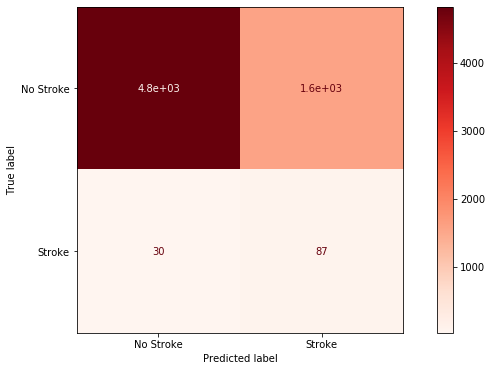

In [344]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
plot_confusion_matrix(rf_clf,x_test,y_test,display_labels=['No Stroke','Stroke'],cmap='Reds',ax=ax)
plt.title('Random Forests Confusion Matrix')
plt.show()

### Lets us use SMOTE as over sampling technique

In [348]:
from imblearn.over_sampling import SMOTE as sm
x_sm,y_sm=sm(sampling_strategy='minority').fit_resample(x_train,y_train)
x_sm=pd.DataFrame(x_sm,columns=x_train.columns)

In [353]:
import time
t0=time.time()
starcv=StratifiedKFold(n_splits=5)
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params,scoring='f1',cv=starcv)
grid_log_reg.fit(x_sm, y_sm)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

# # Support Vector Classifier
# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(SVC(), svc_params)
# grid_svc.fit(X_train, y_train)

# SVC best estimator
# svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params,scoring='f1',cv=starcv)
grid_tree.fit(x_sm, y_sm)

# tree best estimator
tree_clf = grid_tree.best_estimator_

rf_params={'n_estimators': [100,300,500],'max_depth' : [3,4,5,6],'criterion':['gini','entropy']}
grid_rf=GridSearchCV(RandomForestClassifier(),rf_params,scoring='f1',cv=starcv)
grid_rf.fit(x_sm, y_sm)

#rf best estimator
rf_clf=grid_rf.best_estimator_

t1=time.time()
print('time taken for evaluation in seconds:',t1-t0)

time taken for evaluation in seconds: 1214.584331035614


In [463]:
import time
t0=time.time()
starcv=StratifiedKFold(n_splits=5)
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params,scoring='roc_auc',cv=starcv)
grid_log_reg.fit(x_sm, y_sm)
# We automatically get the logistic regression with the best parameters.
log_reg_sm = grid_log_reg.best_estimator_

# # Support Vector Classifier
# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(SVC(), svc_params)
# grid_svc.fit(X_train, y_train)

# SVC best estimator
# svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params,scoring='roc_auc',cv=starcv)
grid_tree.fit(x_sm, y_sm)

# tree best estimator
tree_clf_sm = grid_tree.best_estimator_

rf_params={'n_estimators': [100,300,500],'max_depth' : [3,4,5,6],'criterion':['gini','entropy']}
grid_rf=GridSearchCV(RandomForestClassifier(),rf_params,scoring='roc_auc',cv=starcv)
grid_rf.fit(x_sm, y_sm)

#rf best estimator
rf_clf_sm=grid_rf.best_estimator_

t1=time.time()
print('time taken for evaluation in seconds:',t1-t0)

time taken for evaluation in seconds: 1309.6401510238647


In [464]:
print('Decision Tree_tuned params:CrossVal-AUC: ',np.mean(cross_val_score(tree_clf_sm,x_train,y_train,cv=starcv,scoring='roc_auc')))
print('Logistic Regression_tuned params:CrossVal-AUC: ',np.mean(cross_val_score(log_reg_sm,x_train,y_train,cv=starcv,scoring='roc_auc')))
print('Random Forests_tuned params:CrossVal-AUC: ',np.mean(cross_val_score(rf_clf_sm,x_train,y_train,cv=starcv,scoring='roc_auc')))

Decision Tree_tuned params:CrossVal-AUC:  0.8218152013871987
Logistic Regression_tuned params:CrossVal-AUC:  0.8351101801252726
Random Forests_tuned params:CrossVal-AUC:  0.8390651686676047


In [465]:
pred_log_sm=log_reg.predict(x_test)
# pred_svm=model_svm.predict(x_test)
pred_dtree_sm=tree_clf.predict(x_test)
pred_rf_sm=rf_clf.predict(x_test)


In [467]:
# plot_confusion_matrix(tree_clf,x_test,y_test,display_labels=['No Stroke','Stroke'],cmap='Blues')
print('Thresholded at 0.5','\n','*'*70)
print('Logistic Regression-SMOTE')
print(classification_report(y_test,pred_log_sm))

# print('SVM-RBF')
# print(classification_report(y_test,pred_svm))

print('Decision Tree-SMOTE')
print(classification_report(y_test,pred_dtree_sm))

print('Random Forests-SMOTE')
print(classification_report(y_test,pred_rf_sm))

Thresholded at 0.5 
 **********************************************************************
Logistic Regression-SMOTE
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      6393
           1       0.05      0.76      0.09       117

    accuracy                           0.73      6510
   macro avg       0.52      0.75      0.47      6510
weighted avg       0.98      0.73      0.83      6510

Decision Tree-SMOTE
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      6393
           1       0.05      0.72      0.10       117

    accuracy                           0.77      6510
   macro avg       0.52      0.74      0.48      6510
weighted avg       0.98      0.77      0.85      6510

Random Forests-SMOTE
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      6393
           1       0.05      0.68      0.10       117

    accuracy           

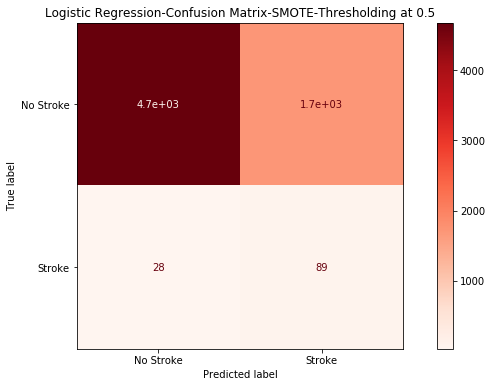

In [468]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
plot_confusion_matrix(log_reg_sm,x_test,y_test,display_labels=['No Stroke','Stroke'],cmap='Reds',ax=ax)
plt.title('Logistic Regression-Confusion Matrix-SMOTE-Thresholding at 0.5')
plt.show()


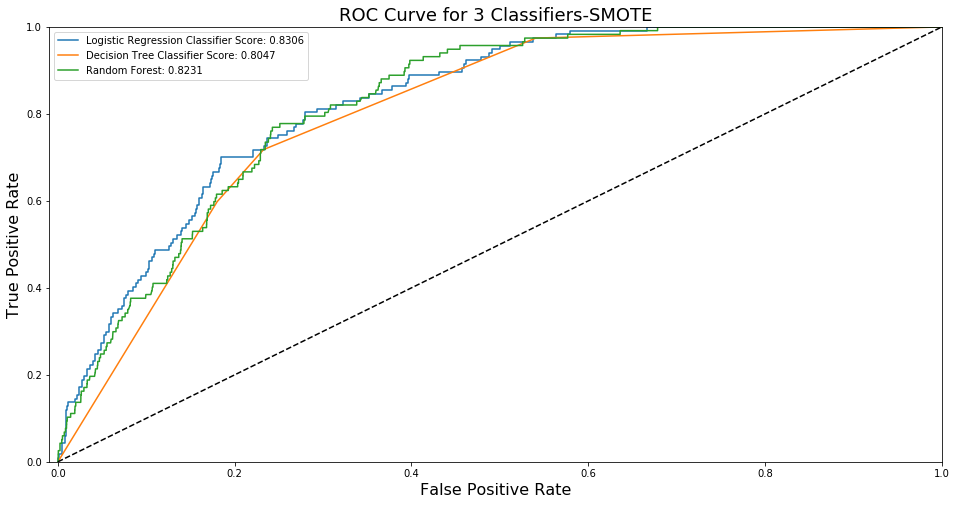

In [471]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, tree_clf.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_clf.predict_proba(x_test)[:,1])



def graph_roc_curve_multiple(log_fpr, log_tpr, dt_fpr, dt_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve for 3 Classifiers-SMOTE', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_sm.predict_proba(x_test)[:,1])))
    plt.plot(dt_fpr, dt_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_clf_sm.predict_proba(x_test)[:,1])))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest: {:.4f}'.format(roc_auc_score(y_test, rf_clf_sm.predict_proba(x_test)[:,1])))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, dt_fpr, dt_tpr, rf_fpr, rf_tpr)
plt.show()

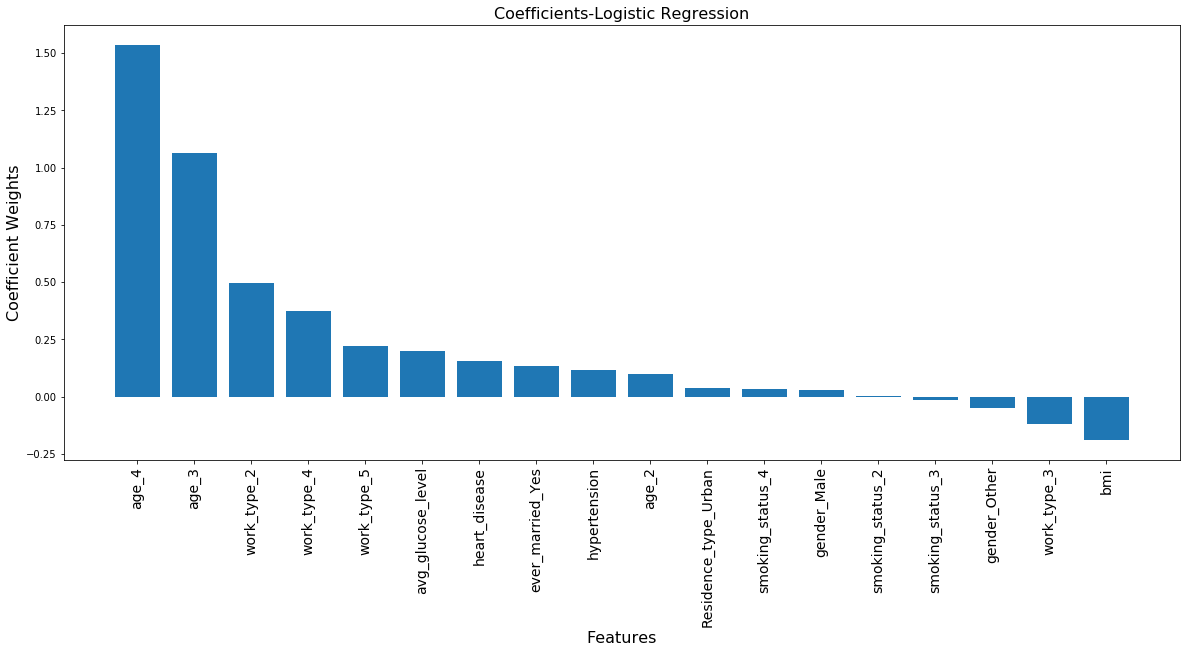

In [440]:
lr_imp=pd.DataFrame(np.transpose(log_reg.coef_),index=x_train.columns,
            columns=['importance']).sort_values('importance',ascending=False)

plt.figure(figsize=(20,8))
plt.bar(x=lr_imp.index,height=lr_imp.importance)
plt.xticks(rotation=90)
plt.ylabel('Coefficient Weights',fontsize=16)
plt.xlabel('Features',fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.title('Coefficients-Logistic Regression',fontsize=16)
plt.show()

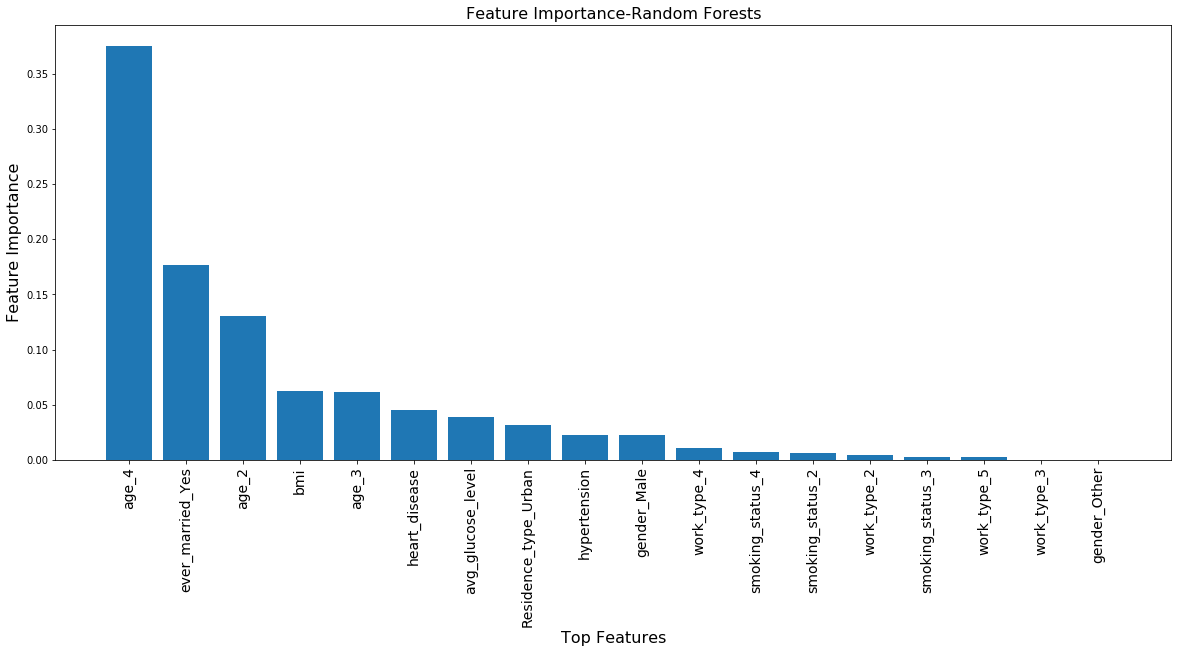

In [441]:
rf_imp=pd.DataFrame(rf_clf.feature_importances_,index=x_train.columns,
            columns=['importance']).sort_values('importance',ascending=False)

plt.figure(figsize=(20,8))
plt.bar(x=rf_imp.index,height=rf_imp.importance)
plt.ylabel('Feature Importance',fontsize=16)
plt.xlabel('Top Features',fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.title('Feature Importance-Random Forests',fontsize=16)
plt.show()

### Although Random Forests and Logistic Regression have different feature importances, but top 5 features are more or less same.'Age4(60-99 years)', 'Age3 (40-60 years)', 'bmi' and 'marital status' seems to be important features. These important features are picked up during the exploratory data analysis. 